# Numerická integrace

Naimportujeme si knihovny potřebné pro následující příklady:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

## Klasické kvadraturní vzorce
- Máme ekvidistantní body $x_{i}$ a vypočteme $f_{i}(x_{i})$
- V 1D aproximujeme integrál pomocí obdélníků/lichoběžníků
- Přesnost je dána šířkou obdélníku

### Newton–Cotesovy vzorce
1. Obdélníkové pravidlo
$$
\int_{x_{1}}^{x_{2}}f(x)\,dx\approx (x_{2}-x_{1})f\left( \dfrac{x_{2}-x_{1}}{2} \right)
$$

2. Lichoběžníkové pravidlo
$$
\int_{x_{1}}^{x_{2}}f(x)\,dx\approx (x_{2}-x_{1})\dfrac{f(x_{1})+f(x_{2})}{2}
$$

3. Simpsonovo pravidlo
 - [Odvození](http://kfe.fjfi.cvut.cz/~vachal/edu/nme/cviceni/07_numint/DOCS/odvozeni_integrace_Lagrange.pdf)
$$
\int_{x_{1}}^{x_{3}}f(x)\,dx\approx (x_{2}-x_{1})\dfrac{f(x_{1})+4f(x_{2})+f(x_{3})}{3}
$$


<div class="alert alert-block alert-warning"><b>Cvičení 09.01: </b>Pomocí obdélníkové, lichoběžníkové a Simpsonovy metody numericky vypočtěte <a href="https://www.wolframalpha.com/input?i=integrate+sin%28x%29+from+1+to+5">integrál</a> $\int_{1}^{5} \sin(x)\,dx$.</div>

In [2]:
# kod

pocet_kroku = 100
a = 1
b = 5

def f(x):
    return np.sin(x)

r = (b-a)/pocet_kroku # velikost kroku

# obdelnikova metoa
S_obdelnik = 0
for i in range(pocet_kroku):
    bod = a + i*r
    # DOPLNTE
    S_obdelnik = S_obdelnik + r*(f(bod+r/2))
print('Obdelnikova metoda: ',S_obdelnik)

# lichobeznikova metoda
S_lichobeznik = 0
for i in range(pocet_kroku):
    bod = a + i*r  
    # DOPLNTE
    S_lichobeznik = S_lichobeznik + r*(f(bod)+f(bod+r))/2
print('Lichobeznikova metoda: ',S_lichobeznik)

# Simpsonovo pravidlo
S_simpson = 0
pocet_kroku_simpson = int(np.round(pocet_kroku/2))
for i in range(pocet_kroku_simpson):
    bod = a + 2*i*r
    # DOPLNTE
    S_simpson = S_simpson + r/3*(f(bod) + 4*f(bod+r) + f(bod + 2*r))
print('Simpsonovo pravidlo: ',S_simpson)

Obdelnikova metoda:  0.256657230544745
Lichobeznikova metoda:  0.2566059008096602
Simpsonovo pravidlo:  0.25664012405560144


## Gaussovy kvadratury

- Výpočet integrálu při neekvidistantním rozdělení bodů $x_{i}$ s různými váhami $w_{i}$
- Chceme spočítat integrál s minimálním počtem vyčíslení $f(x)$
- Volíme optimální polohu bodů $x_{i}$ a příslušné váhy $w_{i}$
- $N+1$ bodů dává přesný výsledek pro polynomy řádu $\leq 2N+1$
- Dvojnásobná přesnost oproti integraci s ekvidistantním rozdělením
- Pro polohu bodů a příslušné váhy používáme tyto polynomy:
 - Legenderovy na intervalu $(-1,1)$
 - Čebyševovy na intervalu $(-1,1)$
 - Laguerrovy na intervalu $(0,+\infty)$
 - Hermiteovy na intervalu $(-\infty,+\infty)$
- Funkci $f(x)$ interpolujeme daným typem polynomu, nalezneme $w_{i}$ a $x_{i}$ 
- Následně lze integrál numericky vypočítat předpisem:
$$
\int_{-1}^{1}f(x)dx\approx \sum_{i=1}^{n}w_{i}f(x_{i})
$$
- Pokud integrujeme přes interval $\langle a,b\rangle$, získáme předpis:
$$
\int_{a}^{b}f(x)dx\approx \sum_{i=1}^{n}\tilde{w}_{i}f(\tilde{x}_{i}),
$$
kde
$$
\tilde{w}_{i} = w_{i}\dfrac{b-a}{2}
$$
$$
\tilde{x}_{i} = \dfrac{(b-a)x_{i}+a+b}{2}
$$

<div class="alert alert-block alert-warning"><b>Cvičení 09.02: </b>Metodou Gaussovy kvadratury numericky vypočtěte <a href="https://www.wolframalpha.com/input?i=sin%28x%29exp%28cos%28x%29%29">integrál</a> $\int_{0}^{\pi} \sin(x)\exp[\cos(x)]\,dx$.</div>

In [3]:
# kod

# v kazdem radku je bod a prislusna vaha vypoctena z interpolace Legenderovym polynomem
vahy = np.array([
[ -0.987992518, 0.03075324221],
[-0.9372733924, 0.07036604699],
[-0.8482065834, 0.1071592202],
[-0.7244177314, 0.139570678],
[-0.5709721726, 0.1662692057],
[-0.3941513471 ,0.1861609998],
[-0.201194094 ,0.1984314853],
[0.0, 0.201194094],
[0.201194094, 0.1984314853],
[0.3941513471, 0.1861609998],
[0.5709721726, 0.1662692057],
[0.7244177314, 0.139570678],
[0.8482065834, 0.1071592202],
[0.9372733924, 0.07036604699],
[0.987992518, 0.03075324221 ]
])

def f(x):
    return np.sin(x)*np.exp(np.cos(x))

# integracni meze
a = 0
b = np.pi

integral = 0

m = vahy.shape[0] # pocet bodu

for i in range(m):
    # prvek vahy[i,0] vrati i-ty bod, prvek vahy[i,1] vrati i-tou vahu
    # body jsou preskalovane z (-1,1) na (a,b)
    # DOPLNTE
    #
    # DOPLNTE
    integral = integral+ vahy[i,1]*(b-a)/2*f(((b-a)*vahy[i,0]+ (a+b))/2)

print('Nas vypocet: ',integral)

kontrola = integrate.quad(f, a, b)[0]
print('Kontrola: ', kontrola)


Nas vypocet:  2.348228171380327
Kontrola:  2.350402387287603


## Rombergova metoda
- Algoritmus na zpřesnění výpočtu integrálu
- Pro zadanou přesnost integrace sníží počet bodů, ve kterých musíme počítat funkční hodnotu
- [Teorie](http://kfe.fjfi.cvut.cz/~vachal/edu/nme/cviceni/07_numint/DOCS/teorie_Rombergova_metoda.pdf)

<div class="alert alert-block alert-warning"><b>Cvičení 09.03: </b> Zpřesněte numerický výpočet <a href="https://www.wolframalpha.com/input?i=sin%28x%29exp%28cos%28x%29%29">integrálu</a> $\int_{0}^{\pi} \sin(x)\exp[\cos(x)]\,dx$ Rombergovou metodou.</div>

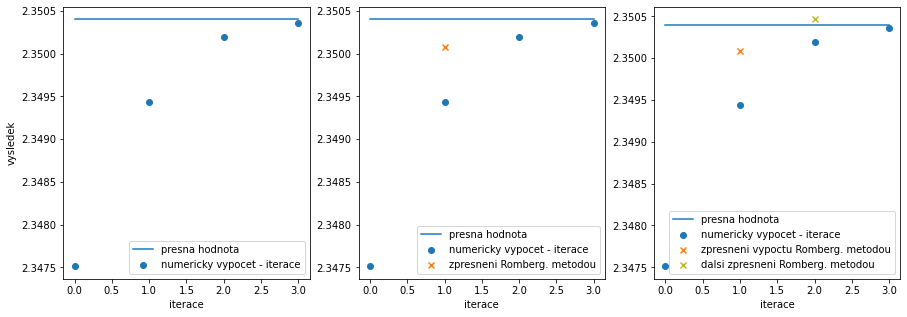

In [4]:
# kod
def f(x):
    return np.sin(x)*np.exp(np.cos(x))

# slozene lichobeznikove pravidlo
def lichobeznik(funkce,odkud,kam,krok):
    xArr = np.arange(odkud, kam, krok)
    integral = 0  
    for x in xArr:
        # secteme vsechny funkcni hodnoty, ktere se opakuji dvakrat
        integral = integral + funkce(x)
    # a odecteme poloviny kraju
    #integral = integral-0.5*funkce(xArr(1)) - 0.5*funkce(xArr(size(xArr,2)));
    integral = integral - 0.5 * funkce(xArr[0]) - 0.5 * funkce(xArr[xArr.size-1])
    return integral * krok    


integ = np.zeros((4,1))
h0 = 0.1
for i in range(4):
    h = h0/(2**(i))
    integ[i,0] = lichobeznik(f,0,np.pi,h)

# presna hodnota:
v = (np.exp(1)-np.exp(-1))
presna_hodnota = v*np.ones((4,1))
#

fig, ax = plt.subplots(1,3,figsize=(15,5))

ax[0].scatter([0,1,2,3],integ,label='numericky vypocet - iterace')
ax[0].plot(presna_hodnota,label='presna hodnota')
ax[0].set_xlabel('iterace')
ax[0].set_ylabel('vysledek')
ax[0].legend()

# zpresneni Romberg. metodou
r1=4/3*integ[1,0]-1/3*integ[0,0]
ax[1].scatter([0,1,2,3],integ,label='numericky vypocet - iterace')
ax[1].plot(presna_hodnota,label='presna hodnota')
ax[1].scatter(1,r1, marker="x",label='zpresneni Romberg. metodou')
ax[1].set_xlabel('iterace')
ax[1].legend()

# dalsi zpresneni Romberg. metodou
r2 = 64/45 * integ[2,0] - 20/45 * integ[1,0] + 1/45*integ[0,0]
ax[2].scatter([0,1,2,3],integ,label='numericky vypocet - iterace')
ax[2].plot(presna_hodnota,label='presna hodnota')
ax[2].scatter(1,r1, marker="x",label='zpresneni vypoctu Romberg. metodou')
ax[2].scatter(2,r2, marker="x",color='C8',label='dalsi zpresneni Romberg. metodou')
ax[2].set_xlabel('iterace')
ax[2].legend()

## Vícedimenzionální integrály
- $N$ dimenzí
- Počet bodů, ve kterých vyčíslujeme funkční hodnotu roste s $N$-tou mocninou
    - Např. 30 bodů v jedné dimenzi, ve třech dimenzích počítáme funkci ve $30^{3}=27000$ bodech
- Metody
 - 1. Snížení dimenze pomocí symetrie
 - 2. Posloupnost opakovaných jednodimenzionálních integrací
 - 3. Monte-Carlo


### Metoda Monte-Carlo
- Integrační oblast $V$ uzavřeme do co nejmenší oblasti se známým objemem $V'$, ve které lze snadno generovat náhodné body
- Vygenerujeme $N$ náhodných bodů ve $V'$ a vypočteme integrál
$$
\int f(\vec{x})dV\approx\dfrac{V'}{N}\sum_{i=1}^{N}f'(\vec{x}_{i}),
$$
kde $f'(\vec{x}) = f(\vec{x})$, pokud $\vec{x}\in V$. Jinak $f'(\vec{x}) = 0$.




<div class="alert alert-block alert-warning"><b>Cvičení 09.04: </b> Metodou Monte-Carlo určete velikost konstanty $\pi$.</div>

Vypoctena hodnota pi =  3.2


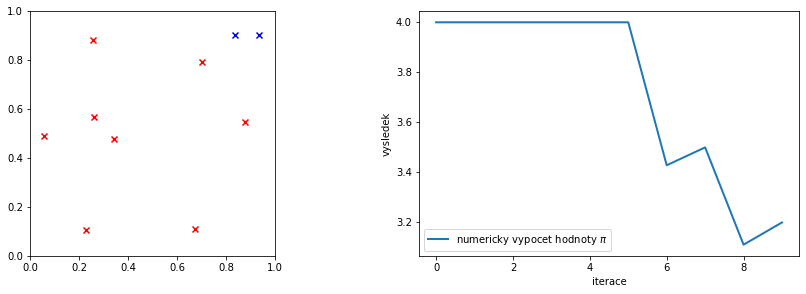

In [5]:
# kod

kapek = 0    # pocet kapek
vkruhu = 0   # pocet kapek v kruhu
npi = 0      # odhad pi
steps = 10 # pocet kroku
plotPi = np.zeros((steps,1))

fig, ax = plt.subplots(1,2,figsize=(15,4.5))

for i in range(steps): 
    kapek = kapek+1
    x = np.random.rand(1,2)    # dve nahodna cisla - bod (x1,x2)
    # jsou uvnitr kruhu se stredem (0.5,0.5) a polomerem 0.5?
    # DOPLNTE
    #
    # DOPLNTE
    if (x[0,0]-0.5)**2+(x[0,1]-0.5)**2<0.5**2:
        vkruhu = vkruhu + 1    # pricteme je
        ax[0].scatter(x[0,0], x[0,1], marker="x", color='red')
    else:
        ax[0].scatter(x[0,0], x[0,1], marker="x", color='blue')
    npi = 4 * vkruhu / kapek
    plotPi[i] = npi 

ax[0].set_aspect('equal')
ax[0].set_xlim((0,1))
ax[0].set_ylim((0,1))

ax[1].plot(plotPi,linewidth=2,label=r'numericky vypocet hodnoty $\pi$')
ax[1].set_ylabel('vysledek')
ax[1].set_xlabel('iterace')
ax[1].legend()

print('Vypoctena hodnota pi = ',npi)


<div class="alert alert-block alert-warning"><b>Cvičení 09.05: </b> Numericky vypočítejte <a href="https://www.wolframalpha.com/input?i=integrate+x%2By+for+0%3Cx%3C1+and+0%3Cy%3C1">integrál</a> $\int_{0}^{1}\int_{0}^{1}(x+y) dx dy$. Vykreslete výslednou hodnotu, absolutní chybu a odhad přesnosti metody v závislosti na počtu kroků.</div>

Numericka integrace =  1.0004753110593314
Kontrola =  1


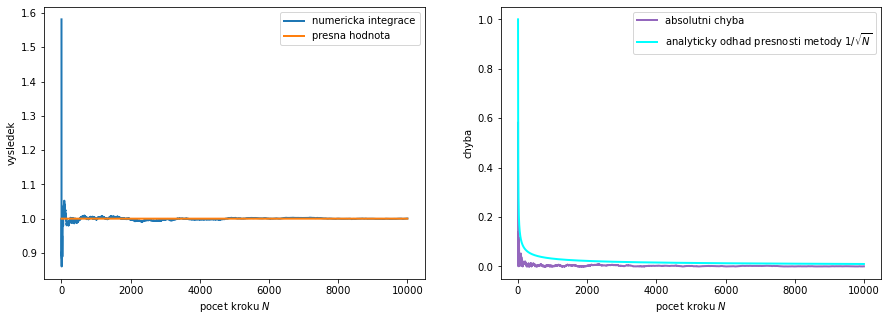

In [6]:
# kod
def f(x,y):
    return x+y

kroku = 10000
vysledky = np.zeros((kroku,1)) # vysledky
uspech = 0   # pocet uspesnych pokusu
suma = 0

for i in range(kroku):
    # DOPLNTE
    # 
    # DOPLNTE
    r = np.random.rand(1,2)  # dve nahodna cisla v intervalu (0,1)
    value =  f(r[0,0],r[0,1])  # vypocteme funkcni hodnotu v techto dvou nahodnych bodech
    suma = suma + value    # pricteme ke kumulovane hodnote
    vysledky[i,0] = suma / (i+1)  # prumer (kumul. hodnota delena poctem kroku)
integral = suma / kroku


spravny_vysledek = 1
print('Numericka integrace = ',integral)
print('Kontrola = ',spravny_vysledek)

spravny_vysledek = spravny_vysledek*np.ones((kroku,1))

# absolutni chyba
abs_chyba = np.abs(vysledky-spravny_vysledek)
# presnost vypoctu metodou Monte-Carlo je ~ 1/sqrt(N)
odhad_presnosti = np.linspace(1,kroku+1,num=kroku)**(-1/2)


fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(vysledky[:,0],linewidth=2,label='numericka integrace')
ax[0].plot(spravny_vysledek*np.ones((kroku,1)),linewidth=2,label='presna hodnota')
ax[0].set_xlabel(r'pocet kroku $N$')
ax[0].set_ylabel('vysledek')
ax[0].legend()

ax[1].plot(abs_chyba,linewidth=2,color='C4',label='absolutni chyba')
ax[1].plot(odhad_presnosti,linewidth=2,color='cyan',label=r'analyticky odhad presnosti metody $1/\sqrt{N}$')
ax[1].set_xlabel(r'pocet kroku $N$')
ax[1].set_ylabel('chyba')
#ax[1].set_xscale('log')
#ax[1].set_yscale('log')
ax[1].legend()
